## Resurgence analysis in QLD

#### Parameters of interest 

There are four main parameters explored:
+ Testing level (low, medium, high). 
    + Medium testing level is the average od daily number of tests performed in the last month (6260).
    + Low tesing level is the average - 1 STD (4160)
    + High testing is the average + 1STD (8360)
    
+ Isolation/Quarantine factor (TL;DR from almost 0: almost compliance to 1: poor compliance)
    + 10 levels of compliance 
+ Incoming infection scenarios:
    + poisson lambda (a stream of infections seeded as a poisson process with parameter lambda)
    + cluster size (seed X infections on day zero)
    
+ Global trasnmissibility 
    + QLD transmissibility from calibration
    + QLD transmissibility * 1.7 to simulat UK variant

#### Outbreak analysis
We want to investigate the probability that imorted new infections would cause an outbreak if they were introduced to the current QLD setting that has no existing infections. *Results shown below are ensemble results* (ie, analysed if there was an outbreak or not, on the median trajectory of `new cases`, number of runs: 100). Remains to do individual analysis to get probabilities.  

A 45-day period was modelled following the introduction of a cluster of new infections of different size (scenario: cluster size), or a stream of new infections (scenario: poisson lambda).  

For the purposes of this notebook, I have classified simulations as an `outbreak` (the 3-day average of new cases per day reached >5 within 45 days); `no-outbreak`. More fine grained classification (ie, contained, under control and outbreak as in Abeysuriya et al 2021, to follow). Note that the definitions are in terms of number of diagnoses rather than raw number of infections, because this is a measurable quantity that could form the basis for potential  policy responses. 

TL;DR results:
+ cluster size scenario: the critical size of the cluster is between 14-21 infections, that is that above 14 infections there's always an outbreak (n.b., given all other parameters in the model). 

+ poisson lambda scenario: the critical lambda is ~ 1.5 new infections per day. As above, a value above $\lambda_{critc}$ means there is always an outbreak.  


In [1]:
#Import all the basic stuff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data - x4 main scenarios 
df_ploz = pd.read_csv('/home/paula/Dropbox/COVID/simulated-data/resurgence/outbreak_poisson_lambda_oz.csv')
df_pluk = pd.read_csv('/home/paula/Dropbox/COVID/simulated-data/resurgence/outbreak_poisson_lambda_uk.csv')
df_cloz = pd.read_csv('/home/paula/Dropbox/COVID/simulated-data/resurgence/outbreak_cluster_size_oz.csv')
df_cluk = pd.read_csv('/home/paula/Dropbox/COVID/simulated-data/resurgence/outbreak_cluster_size_uk.csv')

### Poisson process - Oz/QLD transmisibility

In [3]:
dfploz_6260 = df_ploz[df_ploz["num_tests"] == 6260]
dfploz_4160 = df_ploz[df_ploz["num_tests"] == 4160]
dfploz_8360 = df_ploz[df_ploz["num_tests"] == 8360]

In [4]:
dfploz_6260

,outbreak,outbreak_day,iq_factor,cluster_size,poisson_lambda,num_tests,label,beta
0,False,NaN,0.1,0,0.05,6260,distributed,0.011293
1,False,NaN,0.2,0,0.05,6260,distributed,0.011293
2,False,NaN,0.3,0,0.05,6260,distributed,0.011293
3,False,NaN,0.4,0,0.05,6260,distributed,0.011293
4,False,NaN,0.5,0,0.05,6260,distributed,0.011293
...,...,...,...,...,...,...,...,...
425,True,36.0,0.6,0,2.00,6260,distributed,0.011293
426,True,33.0,0.7,0,2.00,6260,distributed,0.011293
427,True,35.0,0.8,0,2.00,6260,distributed,0.011293
428,True,34.0,0.9,0,2.00,6260,distributed,0.011293


In [5]:
df1 = dfploz_6260[["iq_factor", "outbreak_day", "poisson_lambda"]]
df2 = dfploz_4160[["iq_factor", "outbreak_day", "poisson_lambda"]]
df3 = dfploz_8360[["iq_factor", "outbreak_day", "poisson_lambda"]]

In [6]:
df1_map = df1.pivot("iq_factor", "poisson_lambda", "outbreak_day")
df2_map = df2.pivot("iq_factor", "poisson_lambda", "outbreak_day")
df3_map = df3.pivot("iq_factor", "poisson_lambda", "outbreak_day")

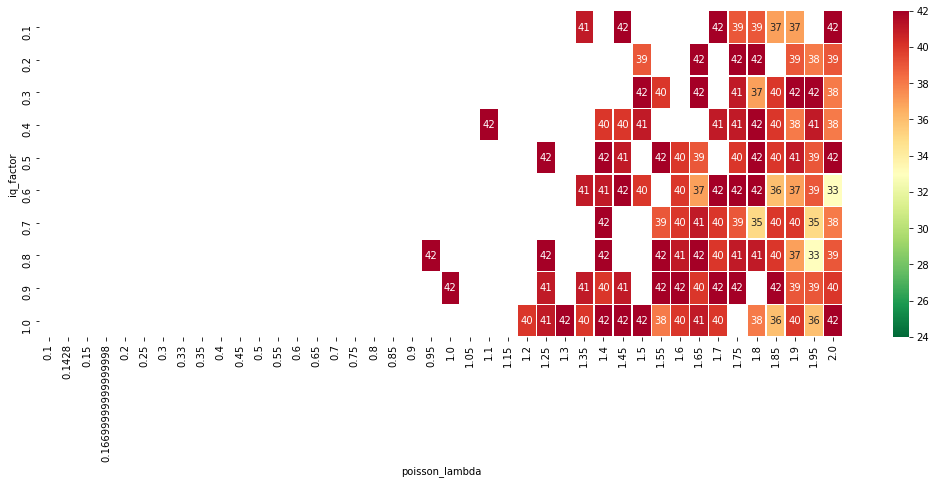

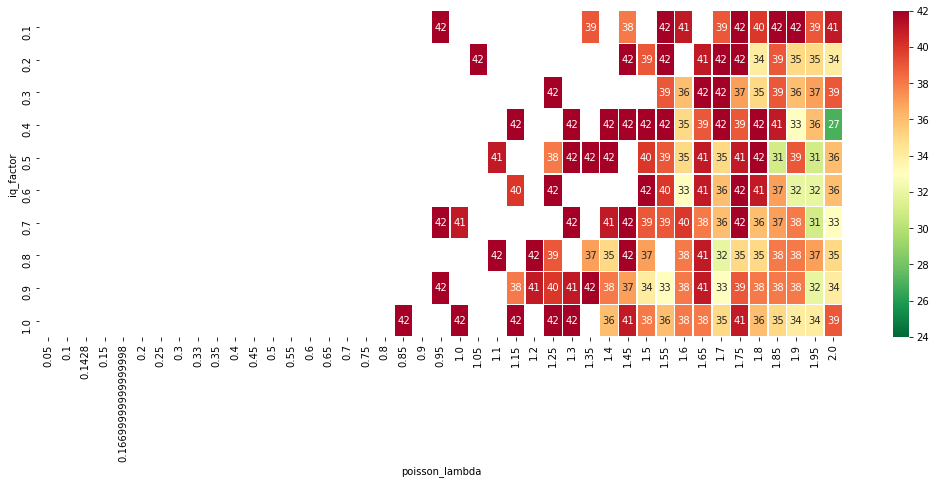

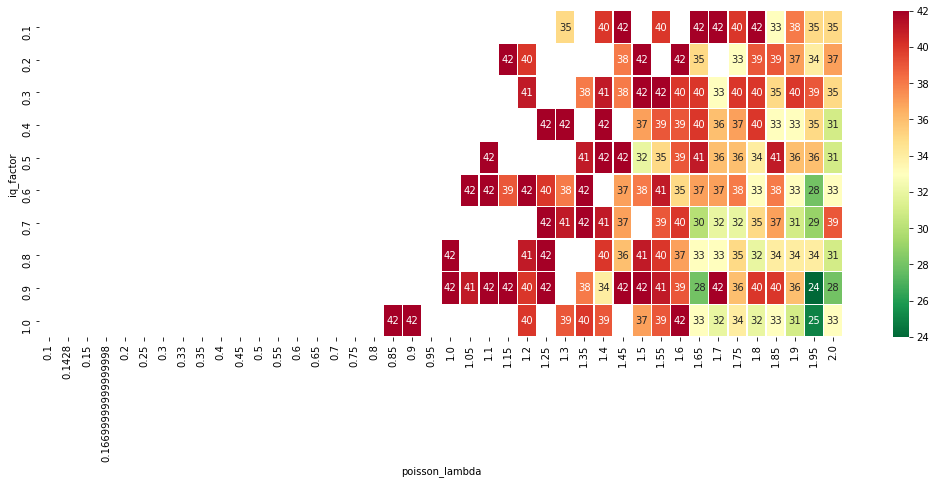

In [9]:
for df_map in [df2_map, df1_map, df3_map]:
    f, ax = plt.subplots(figsize=(18, 6))
    sns.heatmap(df_map, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="RdYlGn_r", vmin=24, vmax=42)

![alt text](files/new_cases_timeseries_ploz.png "Timeseries new cases - poisson lambda QLD")

### Poisson process - UK variant transmisibility

In [10]:
dfpluk_6260 = df_pluk[df_pluk["num_tests"] == 6260]
dfpluk_4160 = df_pluk[df_pluk["num_tests"] == 4160]
dfpluk_8360 = df_pluk[df_pluk["num_tests"] == 8360]

df1 = dfpluk_6260[["iq_factor", "outbreak_day", "poisson_lambda"]]
df2 = dfpluk_4160[["iq_factor", "outbreak_day", "poisson_lambda"]]
df3 = dfpluk_8360[["iq_factor", "outbreak_day", "poisson_lambda"]]

df1_map = df1.pivot("iq_factor", "poisson_lambda", "outbreak_day")
df2_map = df2.pivot("iq_factor", "poisson_lambda", "outbreak_day")
df3_map = df3.pivot("iq_factor", "poisson_lambda", "outbreak_day")



##### Heatmaps
Color and numbers express the number of days from start of simulation (on Feb 1st 2021) until an outbreak is detected. White cells mean no outbreak was detected within 60 days. Longer detection delays are in red, and shorter detection delays are in green (ie, we want to detect an outbreak quickly). Each plot corresponds to different levels of testing. I have mroe data to process with extended ranges for $\lambda$. We probably want to show the value of this parameter such that we detect an outbreak in the community within no more than 5-10 days.   

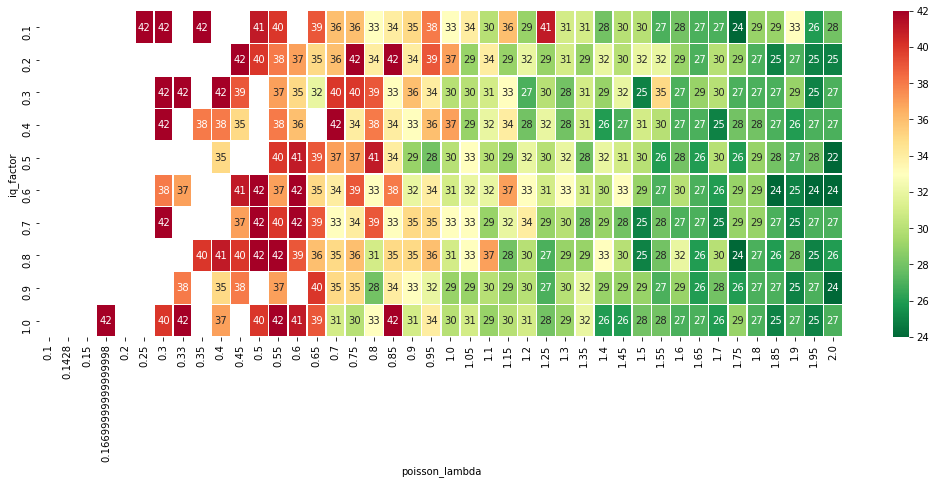

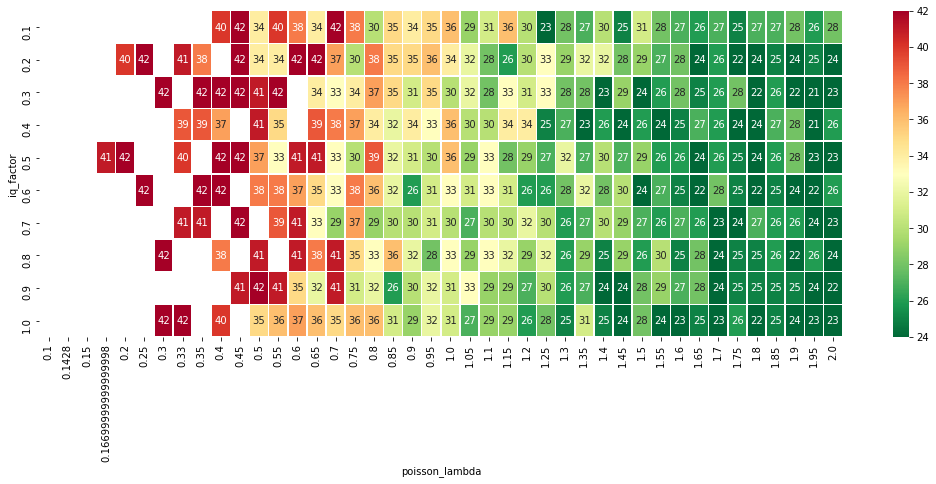

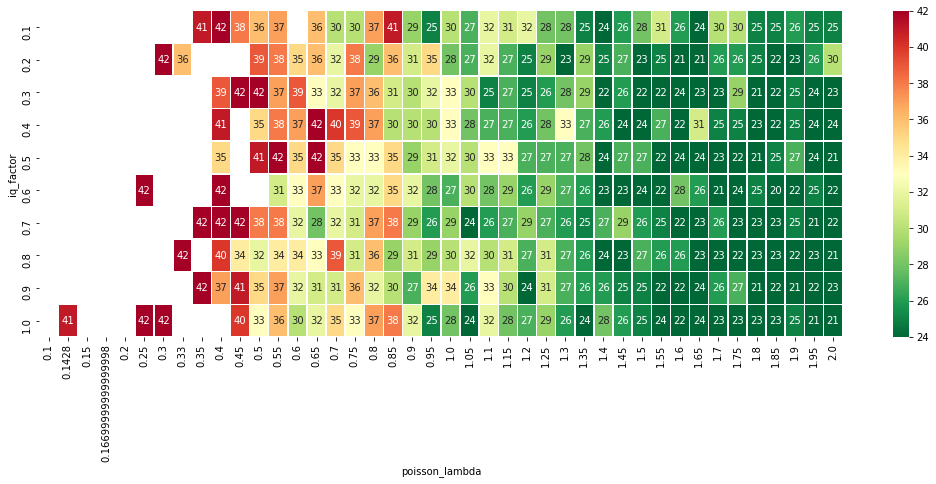

In [11]:
for df_map in [df2_map, df1_map, df3_map]:
    f, ax = plt.subplots(figsize=(18, 6))
    sns.heatmap(df_map, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="RdYlGn_r", vmin=24, vmax=42)

![alt text](files/new_cases_timeseries_pluk.png "Timeseries new cases - poisson lambda UK variant")

### Cluster size - Oz/QLD transmissibility

In [12]:
dfcloz_6260 = df_cloz[df_cloz["num_tests"] == 6260]
dfcloz_4160 = df_cloz[df_cloz["num_tests"] == 4160]
dfcloz_8360 = df_cloz[df_cloz["num_tests"] == 8360]

In [13]:
df1 = dfcloz_6260[["iq_factor", "outbreak_day", "cluster_size"]]
df2 = dfcloz_4160[["iq_factor", "outbreak_day", "cluster_size"]]
df3 = dfcloz_8360[["iq_factor", "outbreak_day", "cluster_size"]]

In [14]:
df1_map = df1.pivot("iq_factor", "cluster_size", "outbreak_day")
df2_map = df2.pivot("iq_factor", "cluster_size", "outbreak_day")
df3_map = df3.pivot("iq_factor", "cluster_size", "outbreak_day")

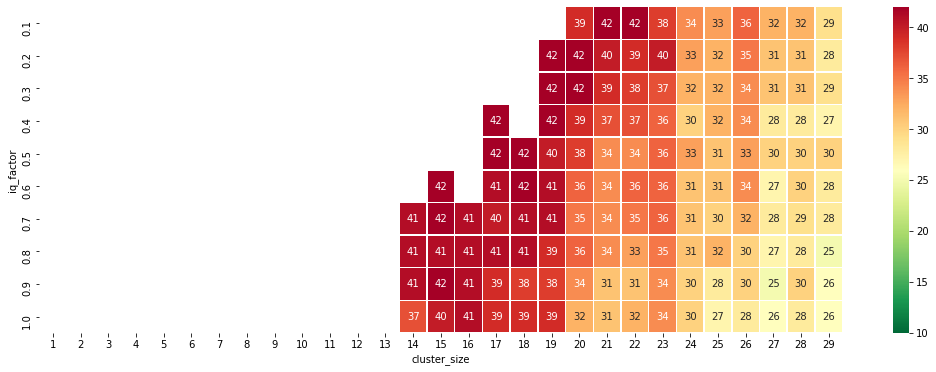

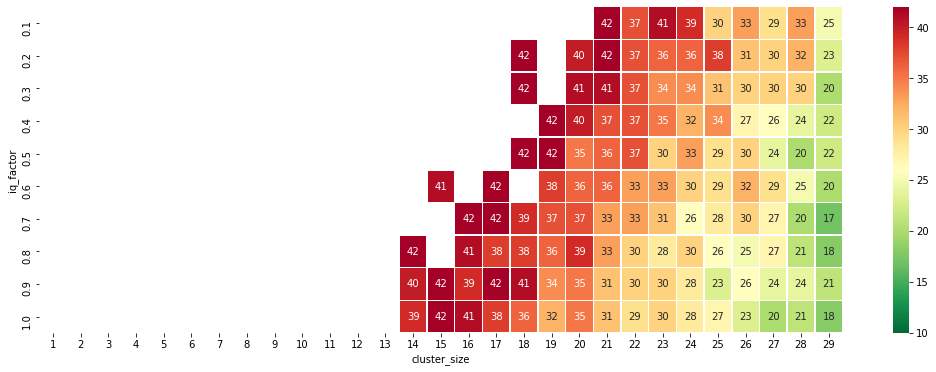

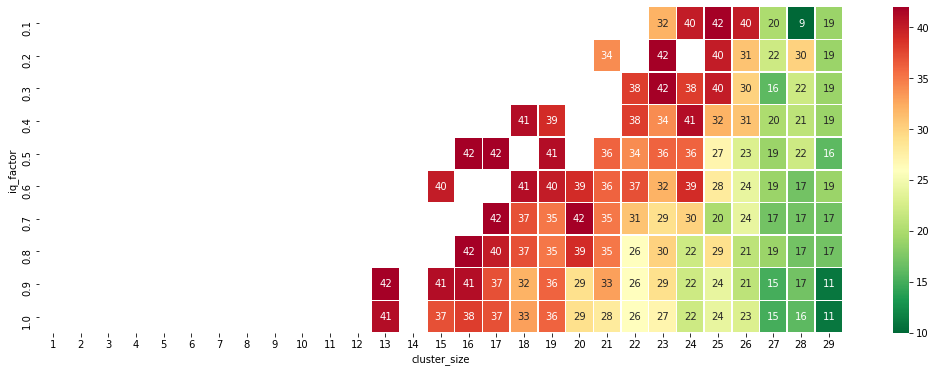

In [15]:
for df_map in [df2_map, df1_map, df3_map]:
    f, ax = plt.subplots(figsize=(18, 6))
    sns.heatmap(df_map, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="RdYlGn_r", vmin=10, vmax=42)

![alt text](files/new_cases_timeseries_cloz.png "Timeseries new cases - cluster size QLD")

### Cluster size - UK variant transmissibility

In [16]:
dfcluk_6260 = df_cluk[df_cluk["num_tests"] == 6260]
dfcluk_4160 = df_cluk[df_cluk["num_tests"] == 4160]
dfcluk_8360 = df_cluk[df_cluk["num_tests"] == 8360]

df1 = dfcluk_6260[["iq_factor", "outbreak_day", "cluster_size"]]
df2 = dfcluk_4160[["iq_factor", "outbreak_day", "cluster_size"]]
df3 = dfcluk_8360[["iq_factor", "outbreak_day", "cluster_size"]]

df1_map = df1.pivot("iq_factor", "cluster_size", "outbreak_day")
df2_map = df2.pivot("iq_factor", "cluster_size", "outbreak_day")
df3_map = df3.pivot("iq_factor", "cluster_size", "outbreak_day")

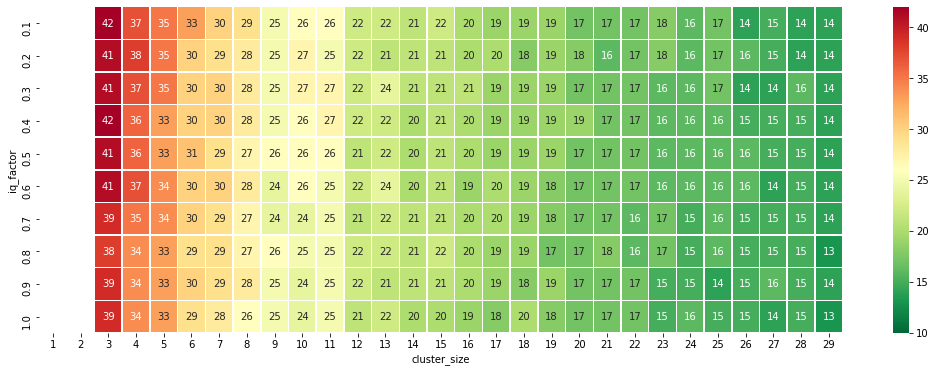

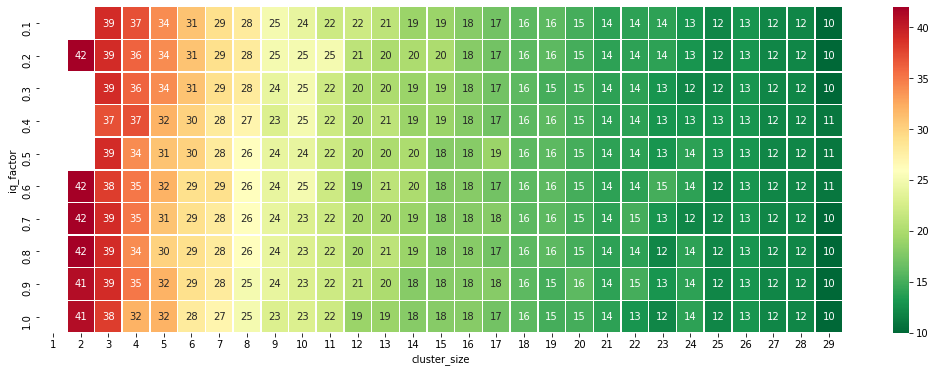

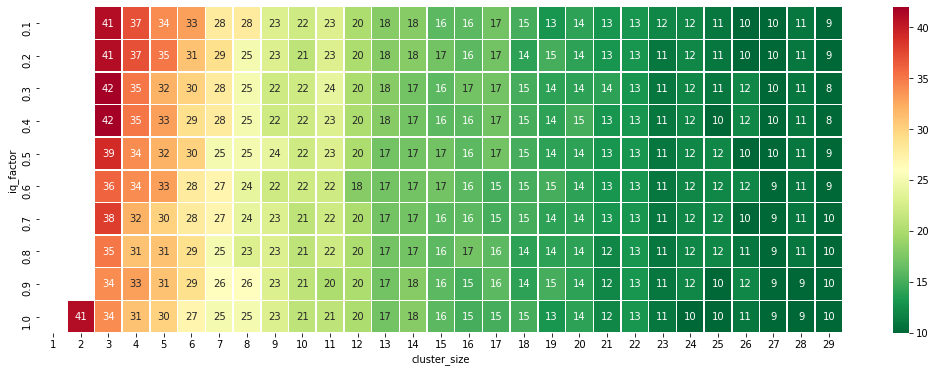

In [17]:
for df_map in [df2_map, df1_map, df3_map]:
    f, ax = plt.subplots(figsize=(18, 6))
    sns.heatmap(df_map, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="RdYlGn_r", vmin=10, vmax=42)

![alt text](files/new_cases_timeseries_cluk.png "Timeseries new cases - cluster size UK variant")